# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_key
from api_keys import geoapify_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# print(f"Number of cities in the list: {len(cities)}")
cities

['portland',
 'ushuaia',
 'heyuan',
 'polyarnyy',
 'fisterra',
 'orumiyeh',
 'manicore',
 'vingt cinq',
 'blackmans bay',
 'port elizabeth',
 'grytviken',
 'albany',
 'saldanha',
 'hawaiian paradise park',
 'adamstown',
 'klyuchi',
 'pechora',
 'bilibino',
 'port-aux-francais',
 'hithadhoo',
 'udachny',
 'mar del plata',
 'laojunmiao',
 'stanley',
 'alpena',
 'kristiansund',
 'ghat',
 'papatowai',
 'little cayman',
 'orapa',
 'mont-tremblant',
 'tadine',
 'tura',
 "al bayda'",
 'fort st. john',
 'dano',
 'arraial do cabo',
 'wauseon',
 'huarmey',
 'boende',
 'igarka',
 'new norfolk',
 'colonia',
 'santana do acarau',
 'charters towers',
 'bethel',
 'margaret river',
 'puerto armuelles',
 'tutoia',
 'wailua homesteads',
 'talnakh',
 'iqaluit',
 'sao joao da barra',
 'happy valley-goose bay',
 'fale old settlement',
 'cable beach',
 'touros',
 'vilyuchinsk',
 'olonkinbyen',
 'road town',
 'port augusta',
 "nar'yan-mar",
 'labuan bajo',
 'ust-nera',
 'fruita',
 'puerto natales',
 'waitang

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

{'coord': {'lon': -55.6649, 'lat': 48.9332}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.65, 'feels_like': 290.78, 'temp_min': 290.65, 'temp_max': 290.65, 'pressure': 1015, 'humidity': 89, 'sea_level': 1015, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 2.22, 'deg': 221, 'gust': 2.59}, 'clouds': {'all': 100}, 'dt': 1720507287, 'sys': {'type': 2, 'id': 2007198, 'country': 'CA', 'sunrise': 1720511356, 'sunset': 1720568773}, 'timezone': -9000, 'id': 5964378, 'name': 'Grand Falls-Windsor', 'cod': 200}


In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_key}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | heyuan
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | fisterra
Processing Record 6 of Set 1 | orumiyeh
Processing Record 7 of Set 1 | manicore
Processing Record 8 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | pechora
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 

In [75]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [77]:
# Convert Kelvin to Celsisus in Max Temp
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,portland,45.5234,-122.6762,30.51,41,0,0.89,US,1720502552
1,ushuaia,-54.8000,-68.3000,3.81,65,0,9.77,AR,1720502853
2,heyuan,23.7333,114.6833,33.78,53,18,2.23,CN,1720502854
3,polyarnyy,69.1989,33.4478,13.05,83,62,1.89,RU,1720502855
4,fisterra,42.9049,-9.2629,18.19,98,99,9.05,ES,1720502857


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [79]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,30.51,41,0,0.89,US,1720502552
1,ushuaia,-54.8000,-68.3000,3.81,65,0,9.77,AR,1720502853
2,heyuan,23.7333,114.6833,33.78,53,18,2.23,CN,1720502854
3,polyarnyy,69.1989,33.4478,13.05,83,62,1.89,RU,1720502855
4,fisterra,42.9049,-9.2629,18.19,98,99,9.05,ES,1720502857


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

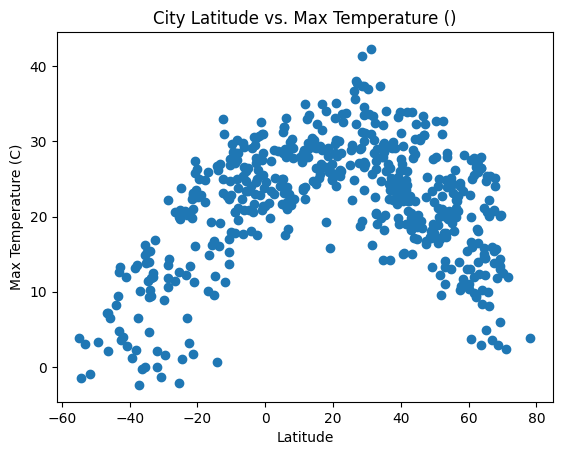

In [80]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature ()")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

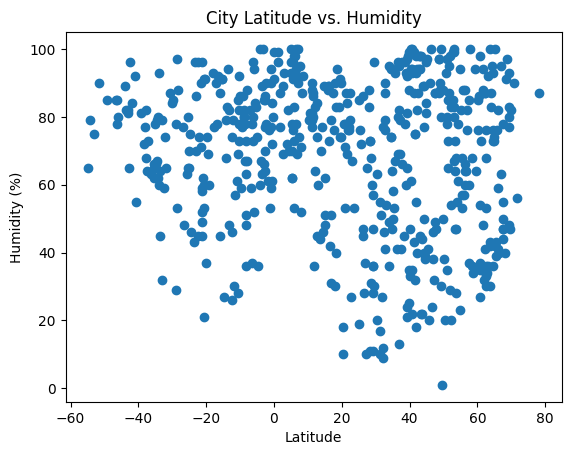

In [81]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

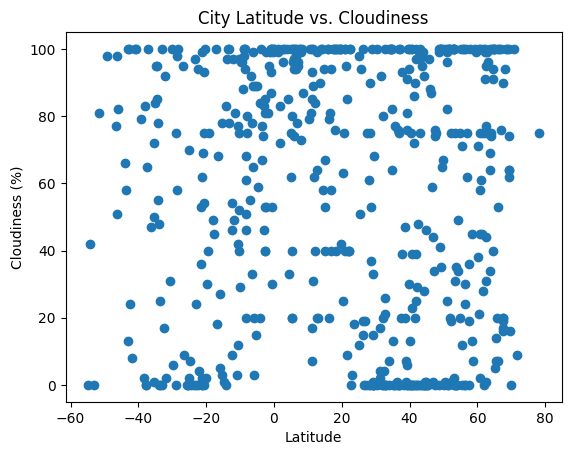

In [82]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

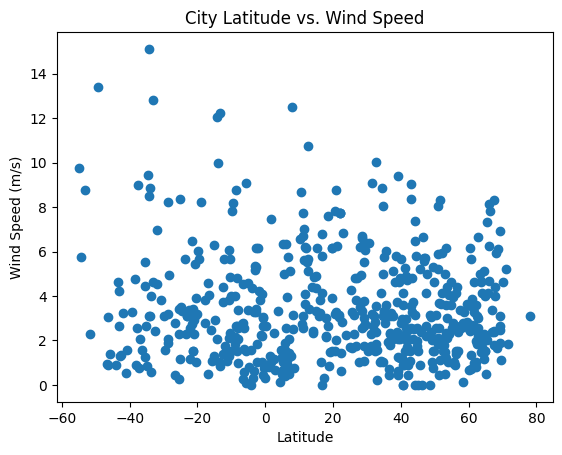

In [83]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def regress_plots(x, y):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    return line_eq 

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,30.51,41,0,0.89,US,1720502552
2,heyuan,23.7333,114.6833,33.78,53,18,2.23,CN,1720502854
3,polyarnyy,69.1989,33.4478,13.05,83,62,1.89,RU,1720502855
4,fisterra,42.9049,-9.2629,18.19,98,99,9.05,ES,1720502857
5,orumiyeh,37.5527,45.0761,24.75,41,20,3.09,IR,1720502858


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,3.81,65,0,9.77,AR,1720502853
6,manicore,-5.8092,-61.3003,24.75,52,3,0.09,BR,1720502860
7,blackmans bay,-43.0167,147.3167,12.63,81,100,2.65,AU,1720502862
8,port elizabeth,-33.9180,25.5701,10.17,60,0,3.09,ZA,1720502864
9,grytviken,-54.2811,-36.5092,-1.52,79,42,5.77,GS,1720502865


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.28915941240722765


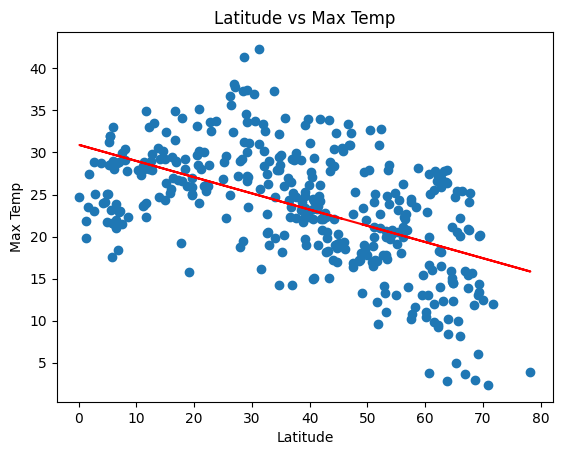

In [87]:
# Linear regression on Northern Hemisphere
equation = regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(equation,(0,280),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.show()

The r-squared is: 0.5912507173687342


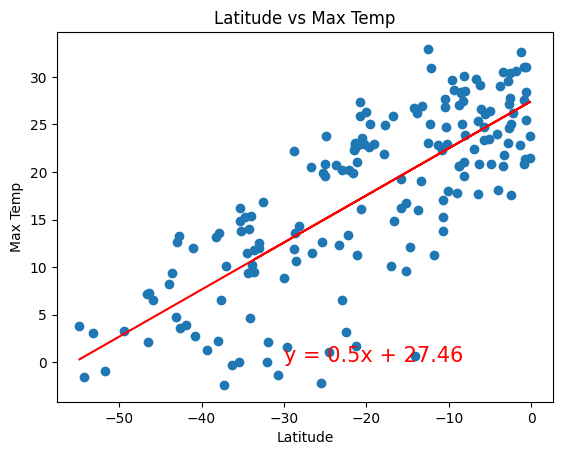

In [88]:
# Linear regression on Southern Hemisphere
equation = regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(equation,(-30,0),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.017296821281834806


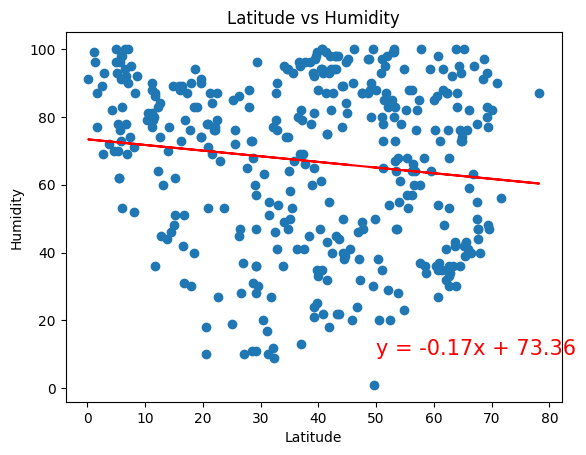

In [89]:
# Northern Hemisphere
equation = regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(equation,(50,10),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.show()

The r-squared is: 0.0008861830069292432


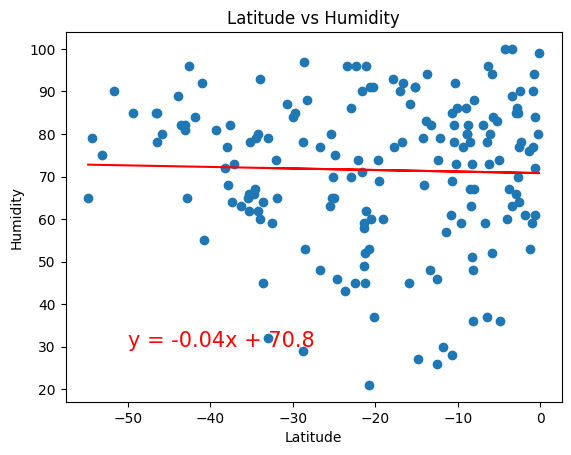

In [90]:
# Southern Hemisphere
equation = regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(equation,(-50,30),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.023685064205393732


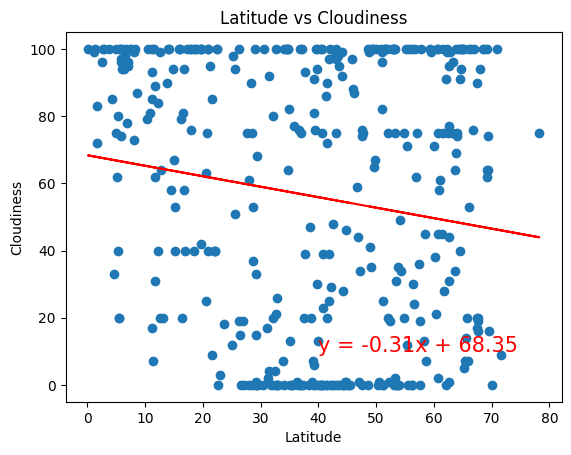

In [91]:
# Northern Hemisphere
equation = regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(equation,(40,10),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.show()

The r-squared is: 0.03676445895793457


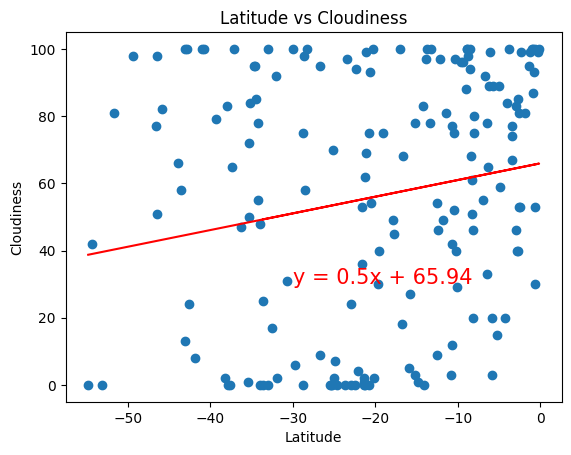

In [70]:
# Southern Hemisphere
equation = regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(equation,(-30,30),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003246595504143646


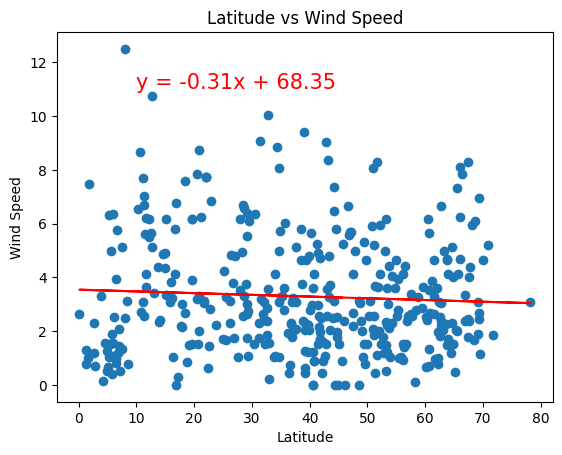

In [92]:
# Northern Hemisphere
regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(equation,(10,11),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.show()

The r-squared is: 0.02468163887204522


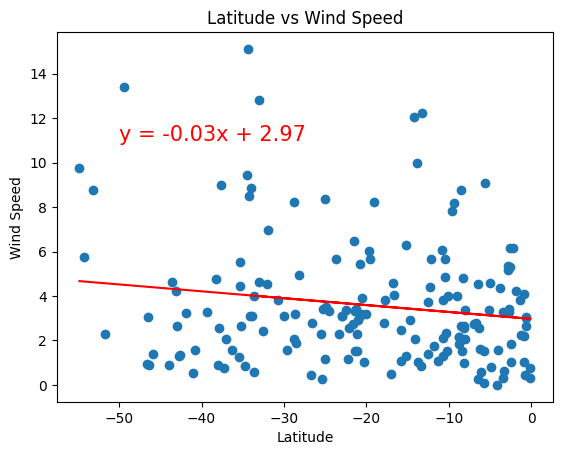

In [72]:
# Southern Hemisphere
equation = regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(equation,(-50,11),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE